In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("digit-MNIST/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = data.drop("label", axis=1)
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.matrix(data)

In [5]:
def plot(data, title = ""):
    fig = plt.figure()
    fig.suptitle(title)
    row = 3
    column = 3
    for i in range(0,9):
        image = data[i]
        image.shape = (28,28)
        fig.add_subplot(3,3,i+1)
        plt.axis("off")
        plt.imshow(255-image, cmap="gray")
    plt.show()

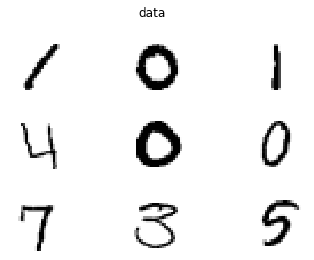

In [6]:
plot(data, "data")

In [44]:
noisy_data = data
noisy_data = np.array(noisy_data).reshape(-1, 28, 28, 1)
noisy_data.shape

(42000, 28, 28, 1)

In [45]:
import random
def addNoise(data, lRow = 7, rRow = 10, lColumn = 7, rColumn = 10):
    length, _, _, _ = data.shape
    for i in range(0, length):
        height = random.randrange(lRow, rRow)
        width = random.randrange(lColumn, rColumn)
        xPos = random.randrange(5,20-width)
        yPos = random.randrange(5,20-height)
        data[i][yPos:yPos+height, xPos:xPos+width] = 0
    return data


In [46]:
noisy_data = addNoise(noisy_data)

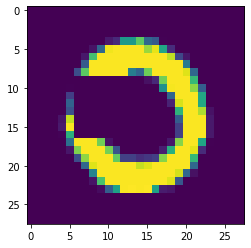

In [47]:
image = noisy_data[1]
image.shape = (28,28)
plt.imshow(image)

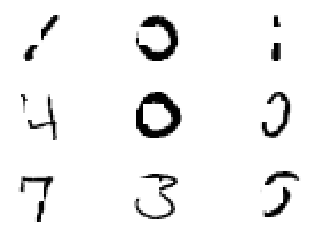

In [48]:
plot(noisy_data)

In [49]:
data = data/255.0
noisy_data = noisy_data/255.0

In [50]:
X_train = noisy_data[:30000]
y_train = data[:30000]
X_test = noisy_data[30000:]
y_test = data[30000:]
X_train = np.array(X_train).reshape(-1, 28, 28, 1)
y_train = np.array(y_train).reshape(-1, 28, 28, 1)
X_test = np.array(X_test).reshape(-1, 28, 28, 1)
y_test = np.array(y_test).reshape(-1, 28, 28, 1)

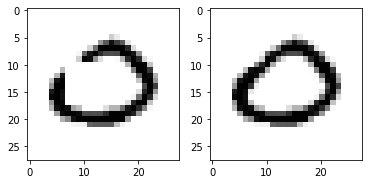

In [58]:
image1 = X_test[2]
image2 = y_test[2]
image1.shape = (28,28)
image2.shape = (28,28)
plt.subplot(1,2,1)
plt.imshow(255-image1,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(255-image2,cmap='gray')
plt.show()

In [59]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# The encoding process
input_img = Input(shape=(28, 28, 1))  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)


In [60]:
############
# Decoding #
############

# DeConv1
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [61]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(loss="binary_crossentropy", optimizer="adam")

In [62]:
# Train the model
autoencoder.fit(X_train, y_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_split=0.1)

Train on 27000 samples, validate on 3000 samples
Epoch 1/10
27000/27000 [==============================] - 139s 5ms/sample - loss: 0.2330 - val_loss: 0.1646
Epoch 2/10
27000/27000 [==============================] - 130s 5ms/sample - loss: 0.1529 - val_loss: 0.1457
Epoch 3/10
27000/27000 [==============================] - 130s 5ms/sample - loss: 0.1409 - val_loss: 0.1369
Epoch 4/10
27000/27000 [==============================] - 130s 5ms/sample - loss: 0.1337 - val_loss: 0.1312
Epoch 5/10
27000/27000 [==============================] - 132s 5ms/sample - loss: 0.1287 - val_loss: 0.1270
Epoch 6/10
27000/27000 [==============================] - 130s 5ms/sample - loss: 0.1246 - val_loss: 0.1233
Epoch 7/10
27000/27000 [==============================] - 131s 5ms/sample - loss: 0.1214 - val_loss: 0.1210
Epoch 8/10
27000/27000 [==============================] - 123s 5ms/sample - loss: 0.1193 - val_loss: 0.1187
Epoch 9/10
27000/27000 [==============================] - 117s 4ms/sample - loss: 0.117

In [63]:
autoencoder.save("image_completion_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: image_completion_model\assets


In [ ]:
import tensorflow as tf
autoencoder = tf.keras.models.load_model("image_completion_model")

In [64]:
def plotOutput(num):
    inputImg = X_test[num]
    inputImg.shape = (28,28)
    plt.subplot(1,2,1)
    plt.title("Noisy image")
    plt.imshow(255-inputImg, cmap='gray')
    prediction = autoencoder.predict([[X_test[num]]])
    prediction.shape = (28,28)
    plt.subplot(1,2,2)
    plt.title("Reconstructed image")
    plt.imshow(255-prediction, cmap='gray')
    plt.show()
    


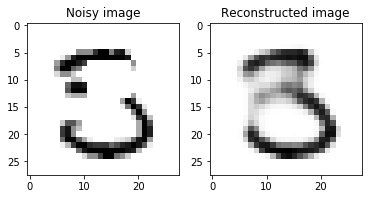

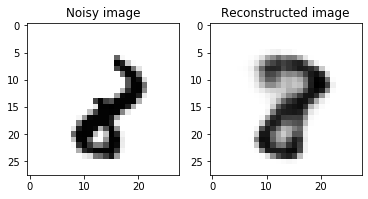

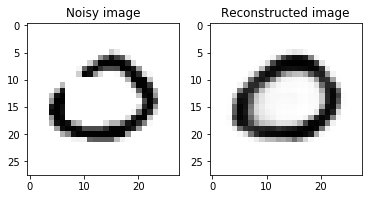

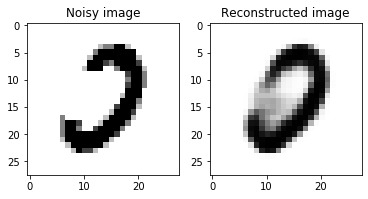

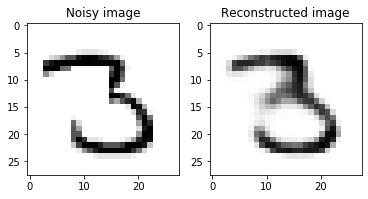

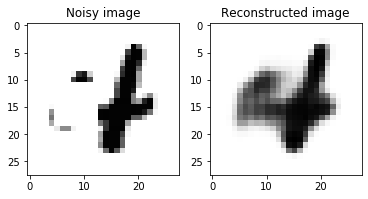

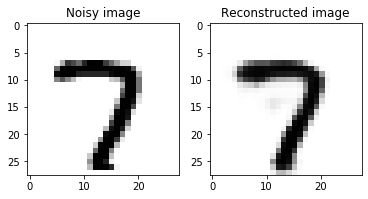

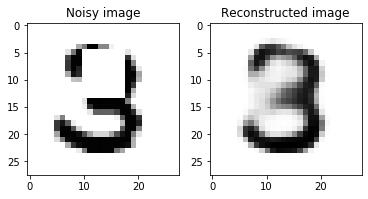

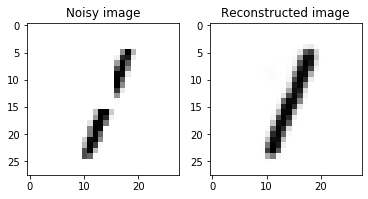

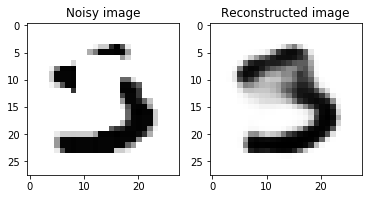

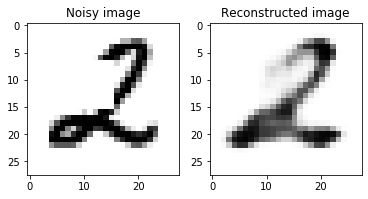

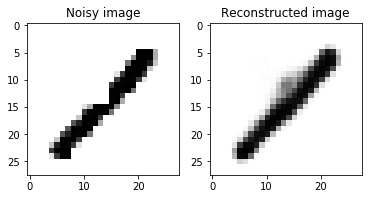

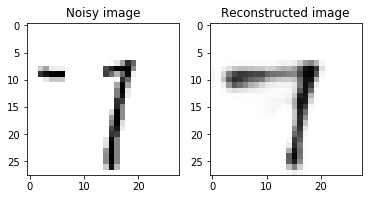

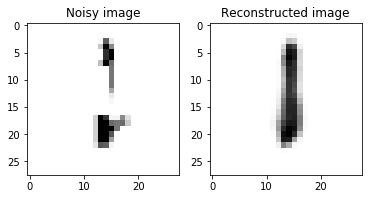

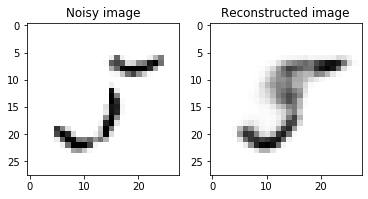

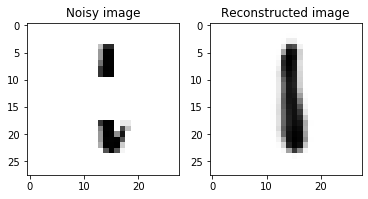

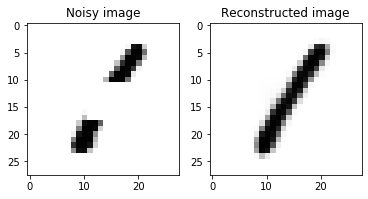

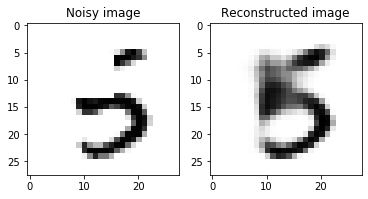

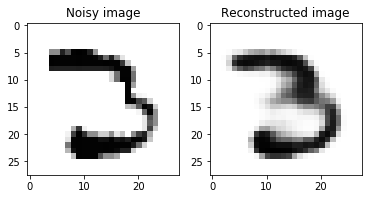

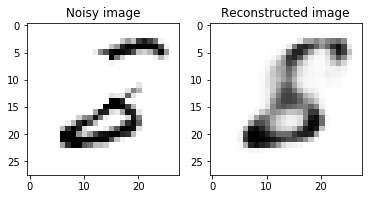

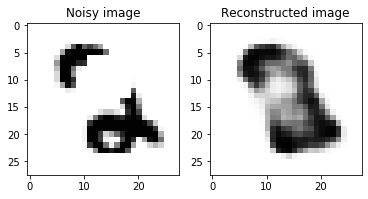

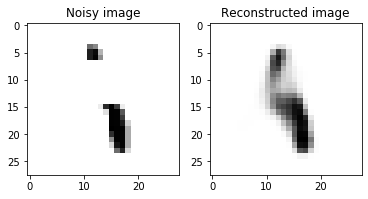

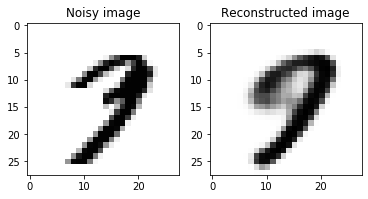

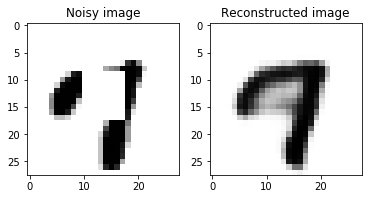

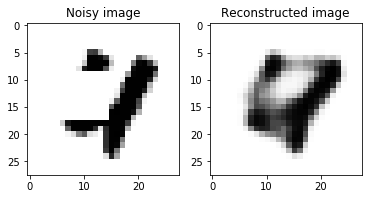

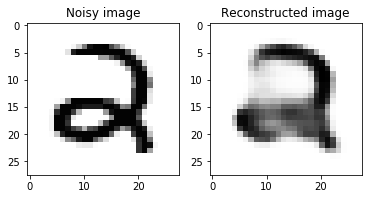

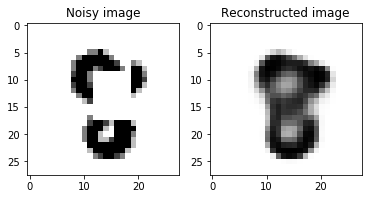

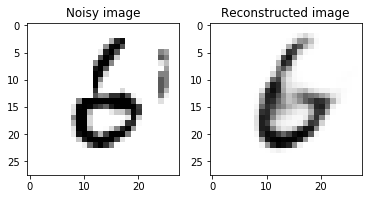

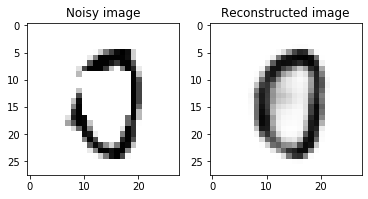

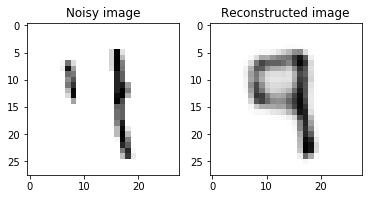

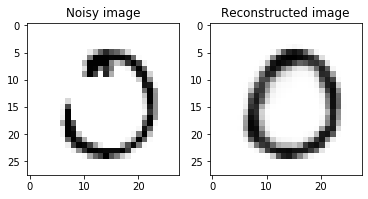

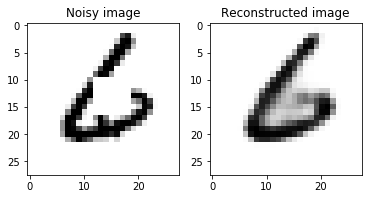

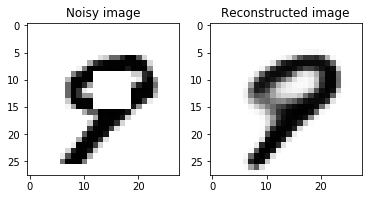

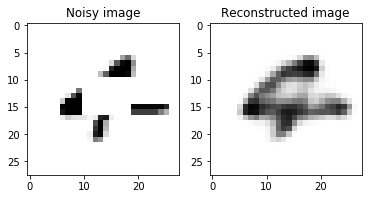

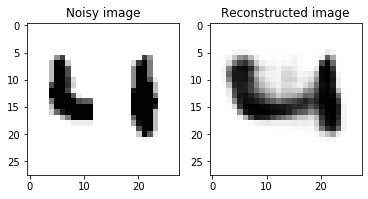

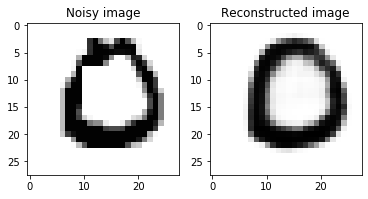

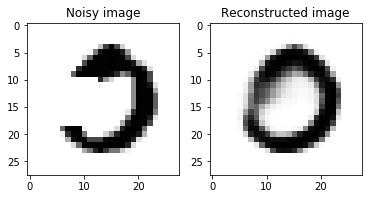

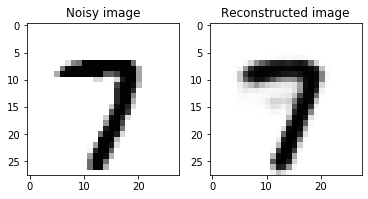

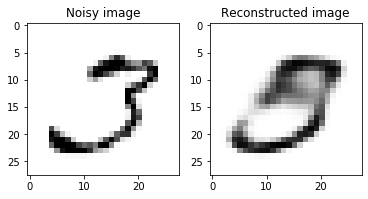

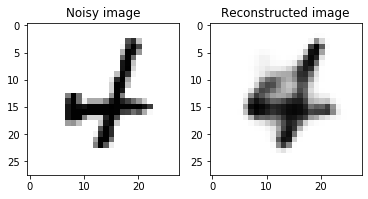

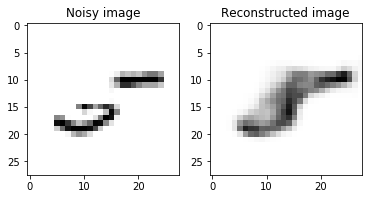

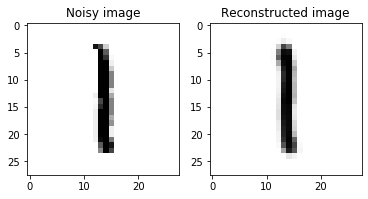

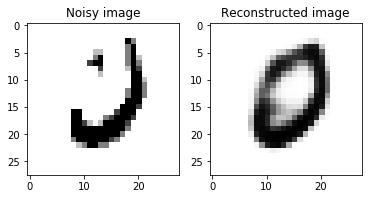

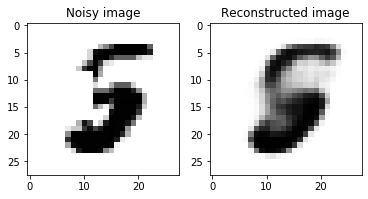

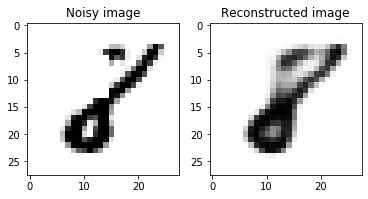

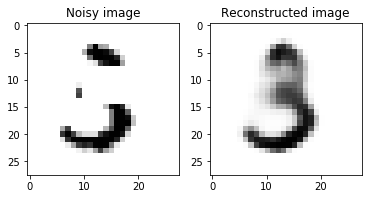

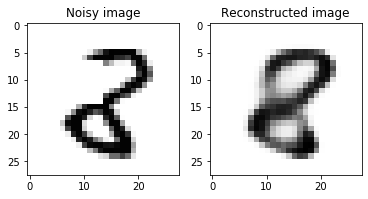

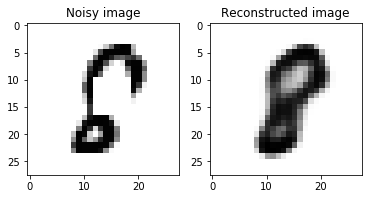

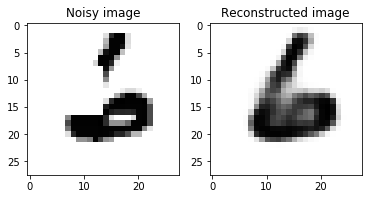

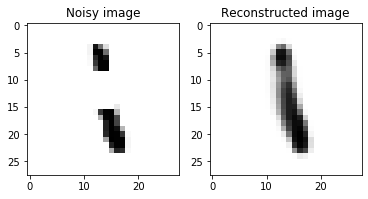

In [74]:
for i in range(0,50):
    plotOutput(i)

In [76]:
X_train = np.array(X_train).reshape(-1, 784)
y_train = np.array(y_train).reshape(-1, 784)
X_test = np.array(X_test).reshape(-1, 784)
y_test = np.array(y_test).reshape(-1, 784)

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()
model.add(Flatten())
model.add(Dense(300))
model.add(Activation("relu"))
model.add(Dense(150))
model.add(Activation("relu"))
model.add(Dense(300))
model.add(Activation("relu"))
model.add(Dense(784))
model.add(Activation("sigmoid"))
#model.add(Dropout(0.2))
model.compile(loss="binary_crossentropy", optimizer="adam")
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Train on 27000 samples, validate on 3000 samples
Epoch 1/10
27000/27000 [==============================] - 14s 501us/sample - loss: 0.1542 - val_loss: 0.1191
Epoch 2/10
27000/27000 [==============================] - 10s 365us/sample - loss: 0.1118 - val_loss: 0.1090
Epoch 3/10
27000/27000 [==============================] - 9s 342us/sample - loss: 0.1045 - val_loss: 0.1044
Epoch 4/10
27000/27000 [==============================] - 9s 321us/sample - loss: 0.1005 - val_loss: 0.1027
Epoch 5/10
27000/27000 [==============================] - 9s 326us/sample - loss: 0.0978 - val_loss: 0.1011
Epoch 6/10
27000/27000 [==============================] - 9s 335us/sample - loss: 0.0958 - val_loss: 0.0986
Epoch 7/10
27000/27000 [==============================] - 9s 351us/sample - loss: 0.0942 - val_loss: 0.0980
Epoch 8/10
27000/27000 [==============================] - 9s 332us/sample - loss: 0.0929 - val_loss: 0.0981
Epoch 9/10
27000/27000 [==============================] - 9s 331us/sample - loss: 0.0

In [83]:
test = data[30000:]

In [88]:
def predict(input_data):
    prediction = model.predict(input_data)
    return prediction


def plot_images(numberOfSamples , title = ""):
    
    originalImages = test[:numberOfSamples]
    noisyImages = X_test[:numberOfSamples]
    predictedImages = predict(noisyImages)
    for i in range(0,numberOfSamples):
        fig = plt.figure()#(figsize=(6,5))
        fig.suptitle(title)
        image1 = originalImages[i] 
        image1.shape = (28,28)
        fig.add_subplot(1,3,1)
        plt.axis('off')
        plt.imshow(255-image1, cmap='gray')
        
        image2 = noisyImages[i] 
        image2.shape = (28,28)
        fig.add_subplot(1,3,2)
        plt.axis('off')
        plt.imshow(255-image2, cmap='gray')
        
        image3 = predictedImages[i] 
        image3.shape = (28,28)
        fig.add_subplot(1,3,3)
        plt.axis('off')
        plt.imshow(255-image3, cmap='gray')

        #fig.tight_layout()
        plt.show()
    

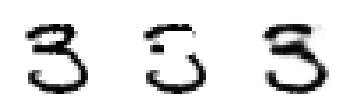

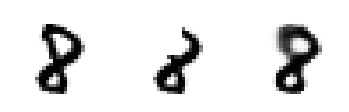

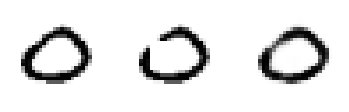

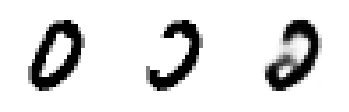

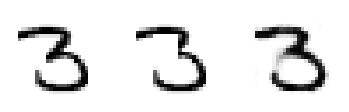

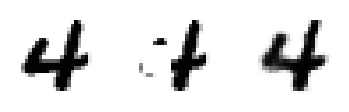

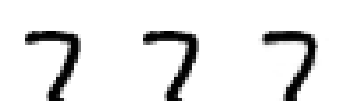

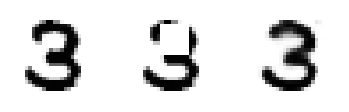

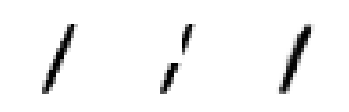

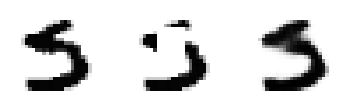

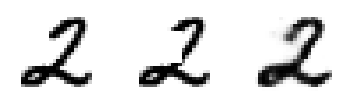

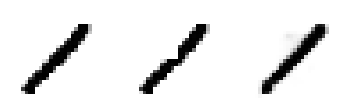

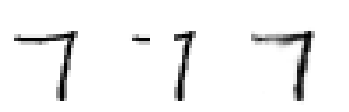

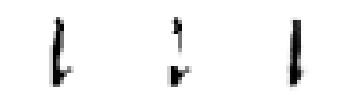

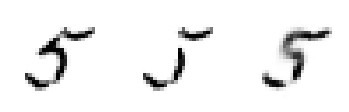

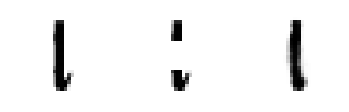

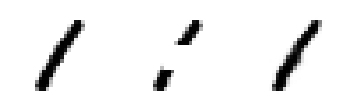

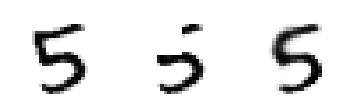

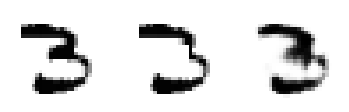

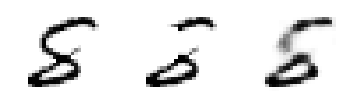

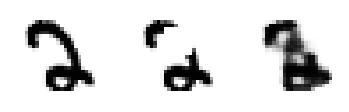

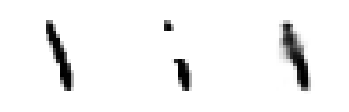

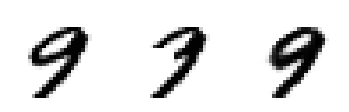

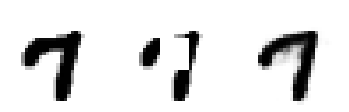

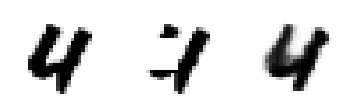

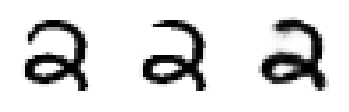

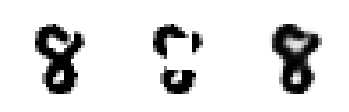

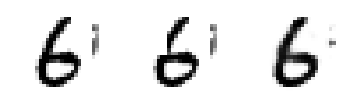

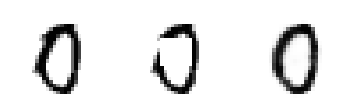

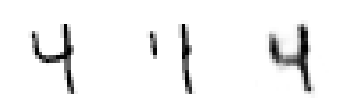

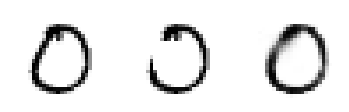

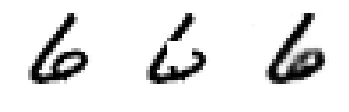

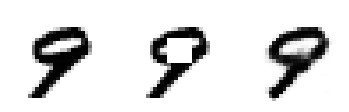

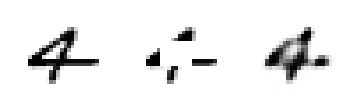

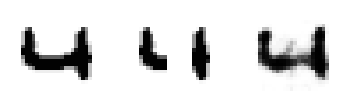

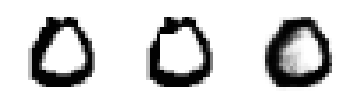

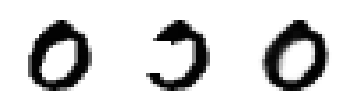

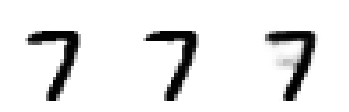

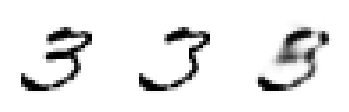

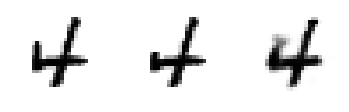

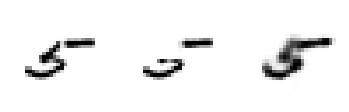

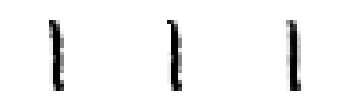

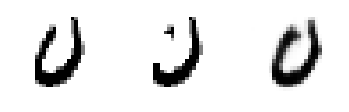

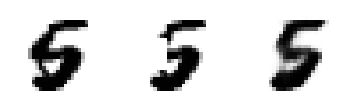

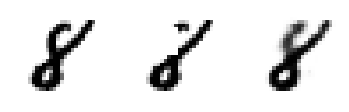

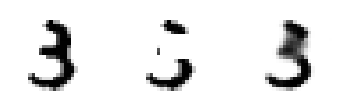

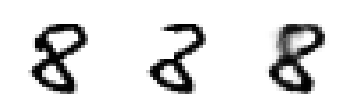

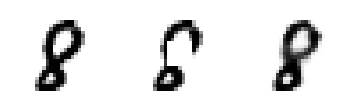

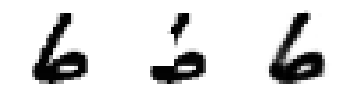

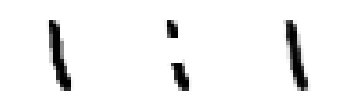

In [90]:
# prediction = predict(X_test[:9])
# plot_images(X_test[:9], "Input/Noisy Images")
# plot_images(prediction, "Reconstructed Images")
plot_images(50)

In [91]:
model.save("image_completion_model2")

INFO:tensorflow:Assets written to: image_completion_model2\assets
